In [3]:
# pip install utils

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

# Get the Data

Dataset : https://www.kaggle.com/datasets/wisnuanggara/daftar-harga-rumah?select=DATA+RUMAH.xlsx

Explanation of each attribute:
- Nama Rumah = House name
- LB = Total Building Area
- LT = Total Land Area
- KT = Number of Bedrooms
- KM = Number of Bathrooms
- GRS = Number of Car Capacity in the Garage
- Harga = House prices (IDR)

**Import Dataset**

In [5]:
df = pd.read_excel("hargarumah_jaksel.xlsx")
df.head()

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


# Clean the data

**Selecting a subset of columns**

In [6]:
df = df.loc[:,['HARGA','LB', 'LT', 'KT', 'KM', 'GRS']]
df.head()

,HARGA,LB,LT,KT,KM,GRS
0,3800000000,220,220,3,3,0
1,4600000000,180,137,4,3,2
2,3000000000,267,250,4,4,4
3,430000000,40,25,2,2,0
4,9000000000,400,355,6,5,3


In [7]:
df.tail()

,HARGA,LB,LT,KT,KM,GRS
1005,9000000000,450,550,10,10,3
1006,4000000000,160,140,4,3,2
1007,4000000000,139,230,4,4,1
1008,19000000000,360,606,7,4,0
1009,10500000000,420,430,7,4,2


In [8]:
df.shape

(1010, 6)

**Checking for empty data**

In [9]:
df.isna().sum()

HARGA    0
LB       0
LT       0
KT       0
KM       0
GRS      0
dtype: int64

# Data Visualization

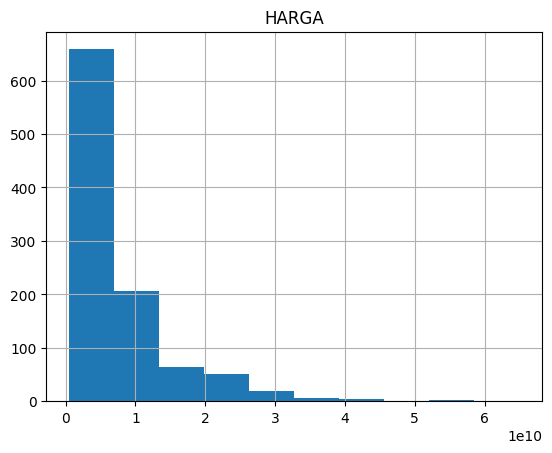

In [10]:
df.hist("HARGA")
plt.show()

<Axes: >

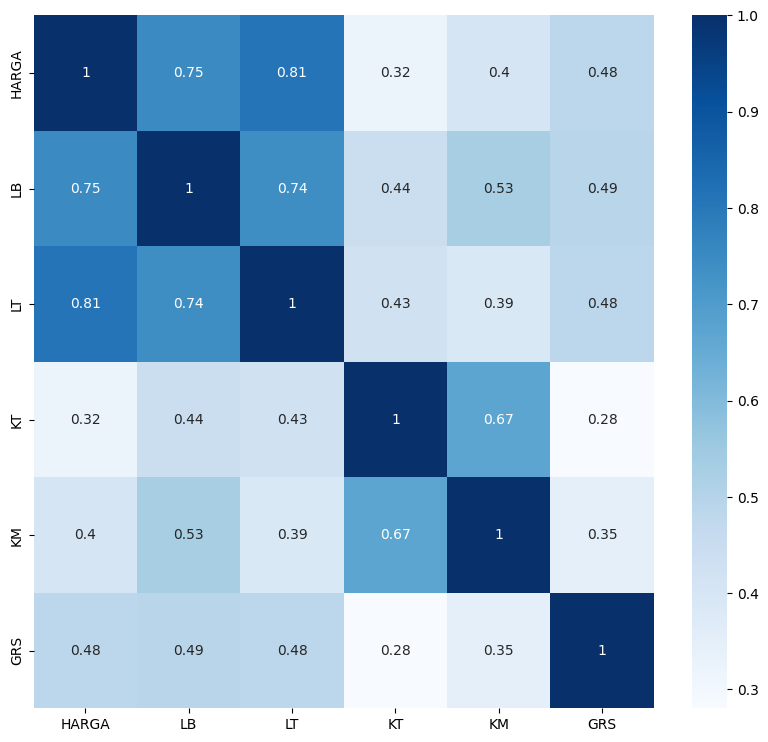

In [11]:
viz_corr = df.corr()
plt.figure(figsize=(10,9))
sns.heatmap(viz_corr, annot=True, cmap="Blues")

# Split the data into training and test sets

In [12]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

**Inspect Data From Training Set**

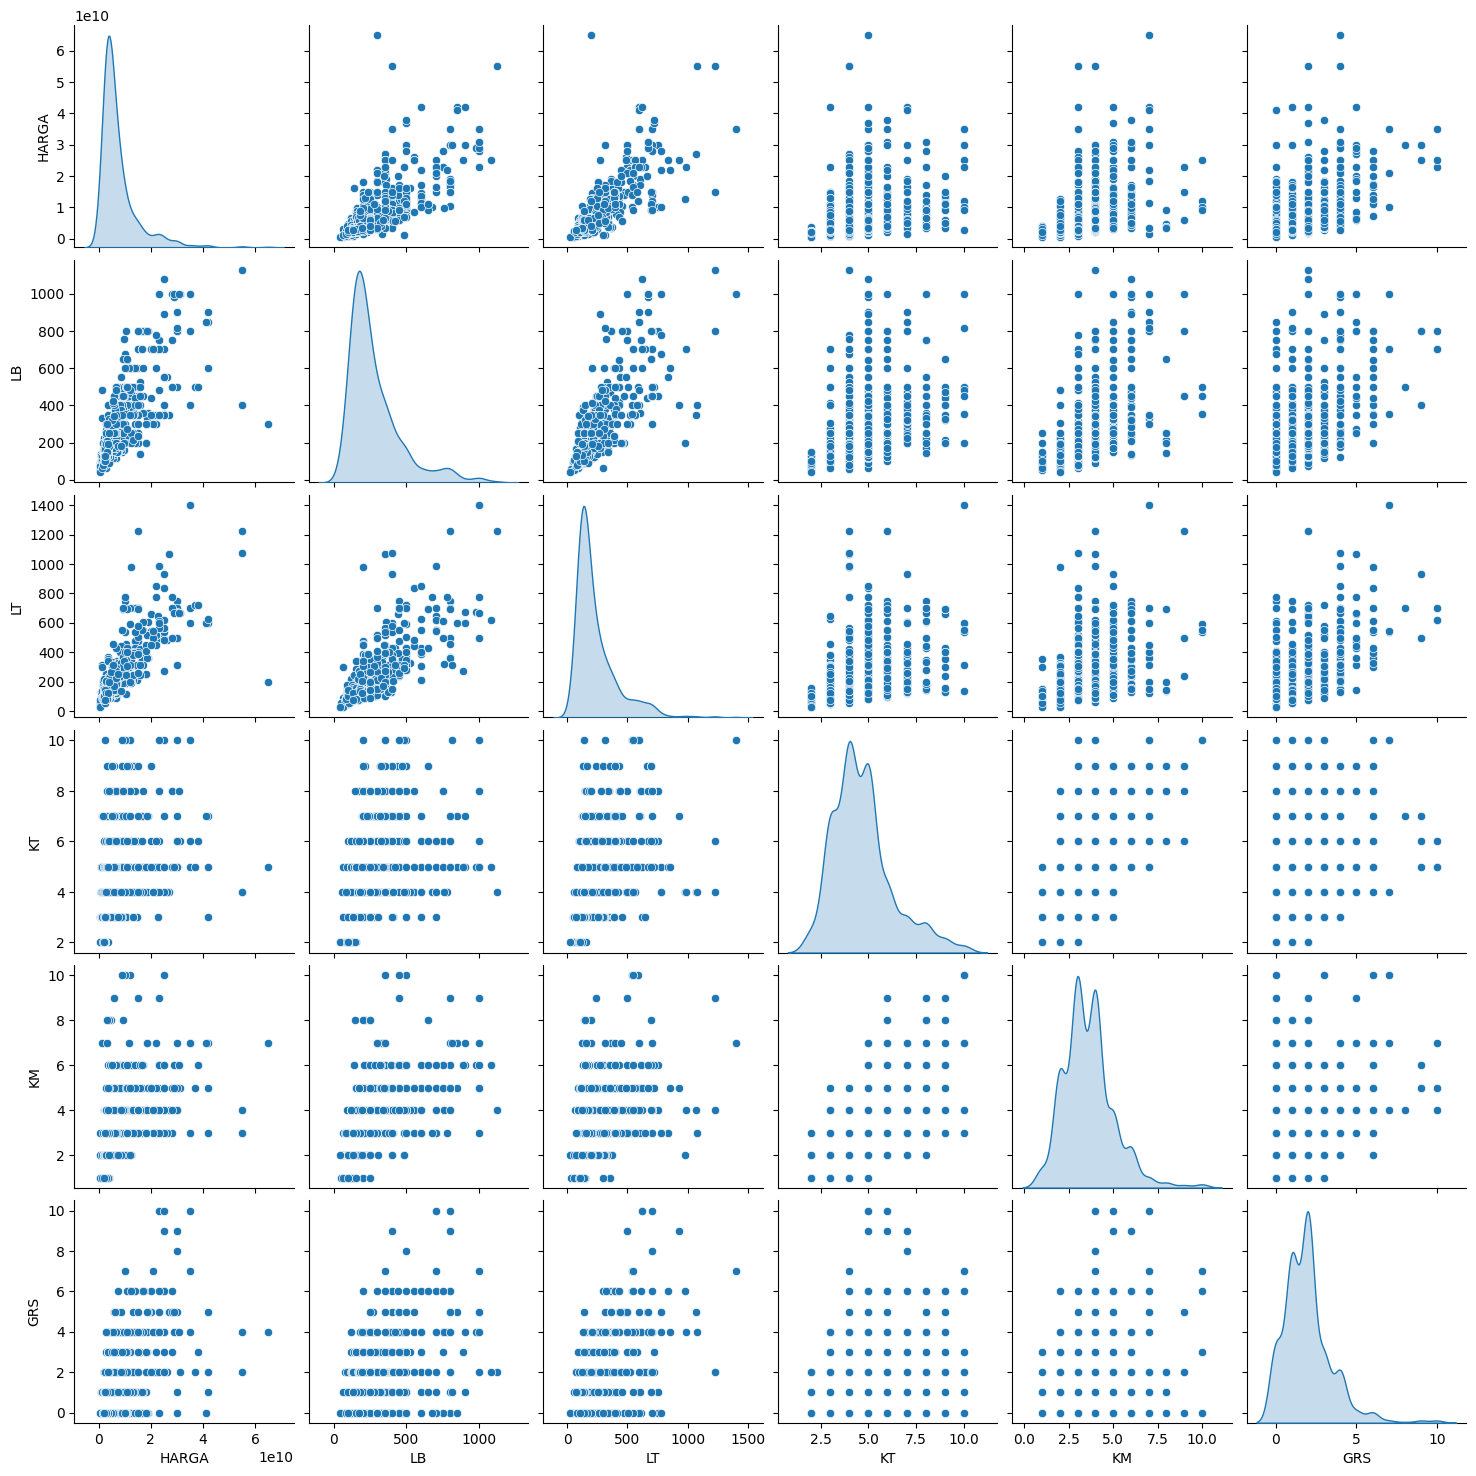

In [13]:
sns.pairplot(train_dataset[['HARGA', 'LB', 'LT', 'KT', 'KM', 'GRS']], diag_kind='kde')

In [14]:
train_dataset.head()

,HARGA,LB,LT,KT,KM,GRS
801,3600000000,150,135,5,3,3
311,12999000000,400,429,9,5,5
85,6750000000,350,210,4,4,1
435,3500000000,90,110,3,3,1
204,690000000,90,50,3,1,0


In [15]:
test_dataset.head()

,HARGA,LB,LT,KT,KM,GRS
9,4500000000,250,96,5,4,1
11,9500000000,450,240,4,4,1
19,9700000000,450,248,5,5,4
23,5500000000,350,230,5,5,3
28,5800000000,175,200,6,4,2


**Split features from labels**

In [16]:
X_train = train_dataset.copy()
X_test = test_dataset.copy()

y_train = X_train.pop("HARGA")
y_test = X_test.pop("HARGA")

In [17]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (808, 5)
y_train shape:  (808,)
X_test shape:  (202, 5)
y_test shape:  (202,)


# Explolatory Data

In [18]:
df.describe()

,HARGA,LB,LT,KT,KM,GRS
count,1.010000e+03,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,7.628987e+09,276.539604,237.432673,4.668317,3.607921,1.920792
std,7.340946e+09,177.864557,179.957604,1.572776,1.420066,1.510998
min,4.300000e+08,40.000000,25.000000,2.000000,1.000000,0.000000
25%,3.262500e+09,150.000000,130.000000,4.000000,3.000000,1.000000
50%,5.000000e+09,216.500000,165.000000,4.000000,3.000000,2.000000
75%,9.000000e+09,350.000000,290.000000,5.000000,4.000000,2.000000
max,6.500000e+10,1126.000000,1400.000000,10.000000,10.000000,10.000000


# Normalization

In [19]:
df.describe().transpose()[['mean', 'std']]

,mean,std
HARGA,7.628987e+09,7.340946e+09
LB,2.765396e+02,1.778646e+02
LT,2.374327e+02,1.799576e+02
KT,4.668317e+00,1.572776e+00
KM,3.607921e+00,1.420066e+00
GRS,1.920792e+00,1.510998e+00


In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

The tf.keras.layers.Normalization is a clean and simple way to add feature normalization into your model.

- The first step is to create the layer
- it the state of the preprocessing layer to the data by calling Normalization.adapt
- Calculate the mean and variance, and store them in the layer



In [21]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [22]:
normalizer.adapt(np.array(X_train))

In [23]:
print(normalizer.mean.numpy())

[[278.67944   237.52724     4.6720285   3.6138608   1.9554454]]


In [24]:
X_train[:1]

,LB,LT,KT,KM,GRS
801,150,135,5,3,3


In [25]:
first = np.array([X_train[:1]])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[[150 135   5   3   3]]]

Normalized: [[[-0.7  -0.57  0.21 -0.44  0.7 ]]]


# Multiple Linear Regression

In [26]:
print(len(X_train.keys()))

5


In [27]:
def get_model():
    linear_model = keras.Sequential([
        normalizer,
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)

    linear_model.compile(loss='mean_absolute_error',
                         optimizer=optimizer,
                         metrics=['mean_squared_error'])

    return linear_model


In [28]:
linear_model = get_model()
linear_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 5)                11        
 n)                                                              
                                                                 
 dense (Dense)               (None, 128)               768       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                        

In [29]:
preds_on_untrained = linear_model.predict(X_train[:10])
preds_on_untrained

1/1 [==============================] - 0s 224ms/step


array([[0.24893853],
       [1.4069765 ],
       [0.08155538],
       [0.16504502],
       [0.4864201 ],
       [0.2877652 ],
       [0.21615657],
       [0.14462718],
       [0.30071905],
       [0.27399024]], dtype=float32)

In [30]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [31]:
# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Training
history = linear_model.fit(X_train, y_train, epochs=1000, batch_size=100,
                    validation_split=0.2, verbose=1, callbacks=[early_stop, checkpoint])

Epoch 1/1000
7/7 [==============================] - 1s 49ms/step - loss: 7663959040.0000 - mean_squared_error: 115929568137632022528.0000 - val_loss: 7546491392.0000 - val_mean_squared_error: 109444639760916152320.0000
Epoch 2/1000
7/7 [==============================] - 0s 12ms/step - loss: 7663951872.0000 - mean_squared_error: 115929427400143667200.0000 - val_loss: 7546474496.0000 - val_mean_squared_error: 109444314305474330624.0000
Epoch 3/1000
7/7 [==============================] - 0s 12ms/step - loss: 7663922688.0000 - mean_squared_error: 115928820469725134848.0000 - val_loss: 7546418688.0000 - val_mean_squared_error: 109443232386032599040.0000
Epoch 4/1000
7/7 [==============================] - 0s 11ms/step - loss: 7663841280.0000 - mean_squared_error: 115927289949539270656.0000 - val_loss: 7546287616.0000 - val_mean_squared_error: 109440663926870114304.0000
Epoch 5/1000
7/7 [==============================] - 0s 15ms/step - loss: 7663662080.0000 - mean_squared_error: 1159238506771

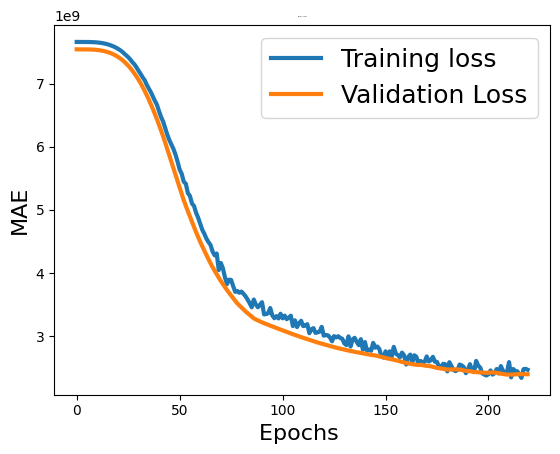

In [32]:
plt.figure()
plt.plot(history.history['loss'],linewidth=3.0)
plt.plot(history.history['val_loss'],linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('MAE',fontsize=16)
plt.title('MAE Curves',fontsize=1)
plt.show()

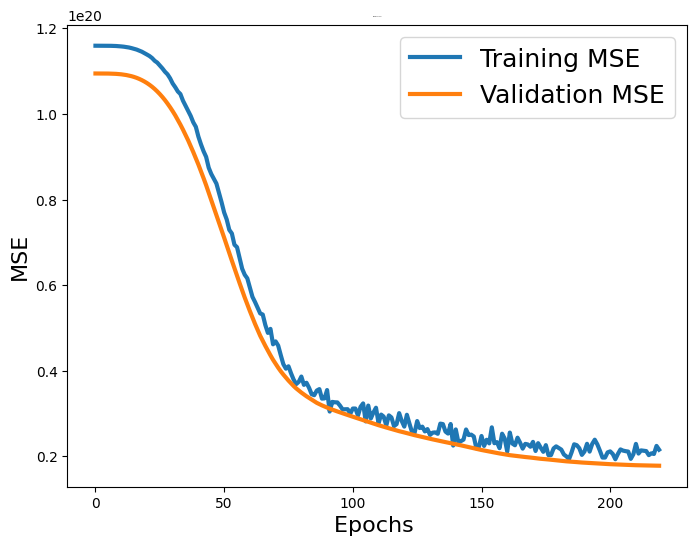

In [33]:
plt.figure(figsize=[8,6])
plt.plot(history.history['mean_squared_error'],linewidth=3.0)
plt.plot(history.history['val_mean_squared_error'],linewidth=3.0)
plt.legend(['Training MSE', 'Validation MSE'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('MSE',fontsize=16)
plt.title('MSE Curves',fontsize=1)
plt.show()

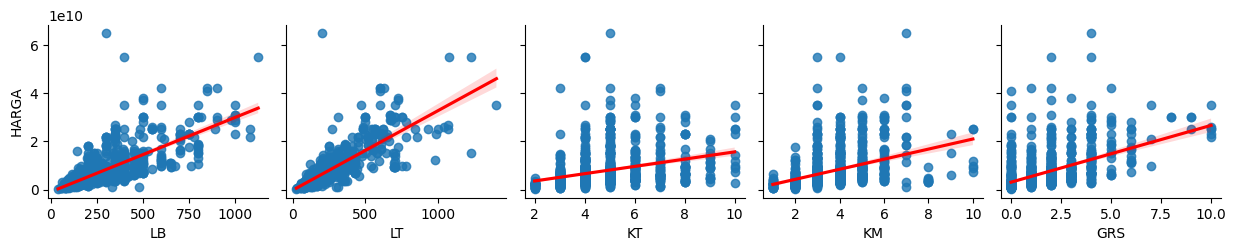

In [34]:
sns.pairplot(df, 
             x_vars=['LB', 'LT', 'KT', 'KM', 'GRS'],
             y_vars=['HARGA'], 
             kind='reg', 
             plot_kws={'line_kws':{'color':'red'}})

In [35]:
preds_on_trained = linear_model.predict(X_train[:10])
preds_on_trained

1/1 [==============================] - 0s 22ms/step


array([[3.6538045e+09],
       [1.3751617e+10],
       [6.8500890e+09],
       [2.9378716e+09],
       [2.6266066e+09],
       [3.8486492e+09],
       [3.6283884e+09],
       [2.6824264e+09],
       [3.7375186e+09],
       [6.2054359e+09]], dtype=float32)

# Evaluate Model

In [36]:
test_results = {}
test_results['linear_model'] = linear_model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 1900567808.0000 - mean_squared_error: 10563018103648681984.0000


In [37]:
test_results

{'linear_model': [1900567808.0, 1.0563018103648682e+19]}

In [38]:
pd.DataFrame(test_results, index=['Mean absolute error [Harga]', 'Mean squared error [Harga]']).T

,Mean absolute error [Harga],Mean squared error [Harga]
linear_model,1.900568e+09,1.056302e+19


# Predictions

7/7 [==============================] - 0s 2ms/step


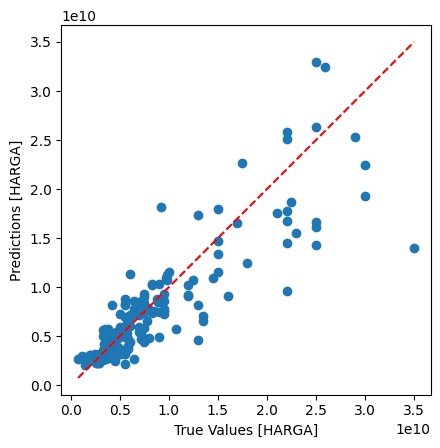

In [39]:
test_predictions = linear_model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [HARGA]')
plt.ylabel('Predictions [HARGA]')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

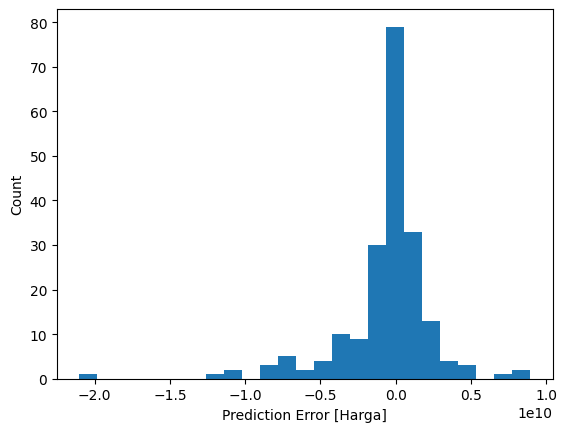

In [40]:
error = test_predictions - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Harga]')
_ = plt.ylabel('Count')

In [41]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# # Computing predictions
# y_pred = linear_model.predict(X_test).flatten()

# Computing R-squared
r_squared = r2_score(y_test, test_predictions)
print("R-squared:", r_squared)

# Computing RMSE
rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print("Root Mean Squared Error (RMSE):", rmse)

# Computing RMAE
rmae = np.sqrt(mean_absolute_error(y_test, test_predictions))
print("Root Mean Absolute Error (RMAE):", rmae)

# Computing MAPE
mape = np.mean(np.abs((y_test - test_predictions) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

R-squared: 0.7608221113795552
Root Mean Squared Error (RMSE): 3250079884.7813396
Root Mean Absolute Error (RMAE): 43595.50336330572
Mean Absolute Percentage Error (MAPE): 24.48456541244171


In [42]:
df.head()

,HARGA,LB,LT,KT,KM,GRS
0,3800000000,220,220,3,3,0
1,4600000000,180,137,4,3,2
2,3000000000,267,250,4,4,4
3,430000000,40,25,2,2,0
4,9000000000,400,355,6,5,3


In [43]:
import math
input_data = [400, 300, 6, 5, 0]  #input LB, LT, KT, KM, GRS

print("Iman's dream house has the following features:")
print("LB: {} (luas bangunan)".format(input_data[0]))
print("LT: {} (luas tanah)".format(input_data[1]))
print("KT: {} (jumlah kamar tidur)".format(input_data[2]))
print("KM: {} (jumlah kamar mandi)".format(input_data[3]))
print("GRS: {} (jumlah garasi)".format(input_data[4]))

predicted_price = math.floor(linear_model.predict([input_data])/1000000)
print("The price Iman's dream house approx IDR {:,} million".format(predicted_price))


Iman's dream house has the following features:
LB: 400 (luas bangunan)
LT: 300 (luas tanah)
KT: 6 (jumlah kamar tidur)
KM: 5 (jumlah kamar mandi)
GRS: 0 (jumlah garasi)
1/1 [==============================] - 0s 64ms/step
The price Iman's dream house approx IDR 8,505 million
